In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import the training dataset
df = pd.read_csv('/content/sample_data/train.csv')

In [ ]:
df.head(11)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1
6,7,C3,679,Owned,Individual,28,28,No,NaN,NaN,NaN,17,10640.0,0
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1
8,9,C15,3497,Owned,Joint,52,43,No,X1,14.0,3.0,1,27283.2,0
9,10,C1,530,Owned,Joint,59,26,Yes,NaN,7.0,4.0,18,21100.8,1


In [ ]:
df.shape

(50882, 14)

In [ ]:
# Check for null values in the dataset
df.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

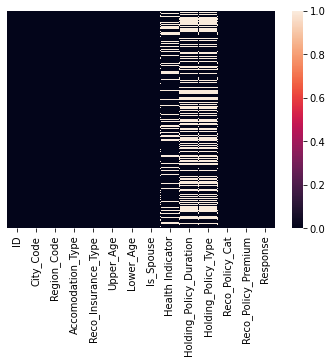

In [ ]:
# Use seaborn library to check for null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

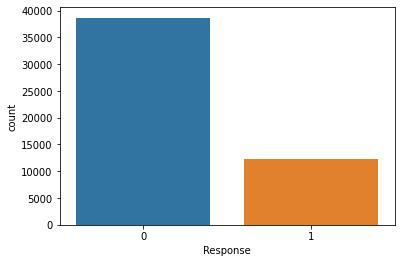

In [ ]:
sns.countplot(x='Response', data = df)

In [ ]:
# rename the column for ease
df.rename(columns = {'Health Indicator':'Health_Indicator'}, inplace = True) 

In [ ]:
# count the distinct values in categorical column
print(df.City_Code.unique())
print(df.Accomodation_Type.unique())
print(df.Reco_Insurance_Type.unique())
print(df.Is_Spouse.unique())
print(df.Health_Indicator.unique())
print(df.Holding_Policy_Duration.unique())

['C3' 'C5' 'C24' 'C8' 'C9' 'C1' 'C15' 'C28' 'C27' 'C7' 'C20' 'C25' 'C4'
 'C2' 'C34' 'C10' 'C17' 'C18' 'C16' 'C29' 'C33' 'C26' 'C19' 'C6' 'C12'
 'C13' 'C11' 'C14' 'C22' 'C23' 'C21' 'C36' 'C32' 'C30' 'C35' 'C31']
['Rented' 'Owned']
['Individual' 'Joint']
['No' 'Yes']
['X1' 'X2' nan 'X4' 'X3' 'X6' 'X5' 'X8' 'X7' 'X9']
['14+' nan '1.0' '3.0' '5.0' '9.0' '14.0' '7.0' '2.0' '11.0' '10.0' '8.0'
 '6.0' '4.0' '13.0' '12.0']


In [ ]:
# Handle missing categorical data using Mode
df['Health_Indicator'] = df['Health_Indicator'].fillna(df['Health_Indicator'].mode()[0])
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].fillna(df['Holding_Policy_Duration'].mode()[0])

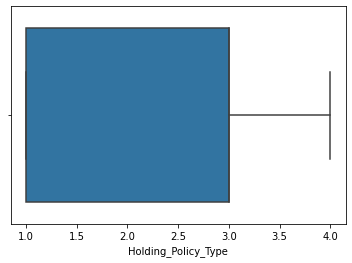

In [ ]:
# Finding outliers in the dataset
sns.boxplot(x=df['Holding_Policy_Type'])

In [ ]:
# No outliers , so replace it with mean
df['Holding_Policy_Type']= df['Holding_Policy_Type'].fillna(df['Holding_Policy_Type'].mean())

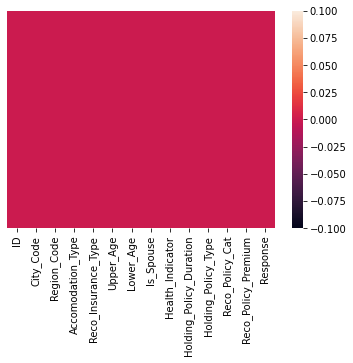

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True)

In [ ]:
df.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health_Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [ ]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.000000,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,1.0,2.439228,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,X1,1.0,1.000000,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.000000,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.000000,16,10404.0,0


In [ ]:
# convert from categorical data to label encoded data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#df['City_Code'] = le.fit_transform(df['City_Code'])
df['Accomodation_Type'] = le.fit_transform(df['Accomodation_Type'])
df['Reco_Insurance_Type'] = le.fit_transform(df['Reco_Insurance_Type'])
df['Is_Spouse'] = le.fit_transform(df['Is_Spouse'])
#df['Health_Indicator'] = le.fit_transform(df['Health_Indicator'])
#df['Holding_Policy_Duration'] = le.fit_transform(df['Holding_Policy_Duration'])

In [ ]:
# drop the unnecessary columns
df.drop(['City_Code'],axis = 1,inplace = True)
df.drop(['ID'],axis = 1,inplace = True)
df.drop(['Region_Code'],axis = 1,inplace = True)

In [ ]:
df.shape

(50882, 11)

In [ ]:
# Create independent and dependent variables
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X.head()

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,1,0,36,36,0,X1,14+,3.000000,22,11628.0
1,0,1,75,22,0,X2,1.0,2.439228,22,30510.0
2,0,0,32,32,0,X1,1.0,1.000000,19,7450.0
3,0,1,52,48,0,X1,14+,3.000000,19,17780.0
4,1,0,44,44,0,X2,3.0,1.000000,16,10404.0


In [ ]:
X.shape

(50882, 10)

In [ ]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Response, dtype: int64

In [ ]:
y.shape

(50882,)

In [ ]:
# One hot encode the remaining categorical column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 0.0 ... 3.0 22 11628.0]
 [0.0 1.0 0.0 ... 2.4392282328360158 22 30510.0]
 [1.0 0.0 0.0 ... 1.0 19 7450.0]
 ...
 [0.0 1.0 0.0 ... 1.0 12 11374.0]
 [0.0 1.0 0.0 ... 2.0 16 28179.2]
 [0.0 0.0 1.0 ... 3.0 18 11424.0]]


In [ ]:
X_new = pd.DataFrame(X) 
X_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,0,0,0,0,0,0,0,0,1,0,36,36,0,14+,3,22,11628
1,0,1,0,0,0,0,0,0,0,0,1,75,22,0,1.0,2.43923,22,30510
2,1,0,0,0,0,0,0,0,0,0,0,32,32,0,1.0,1,19,7450
3,1,0,0,0,0,0,0,0,0,0,1,52,48,0,14+,3,19,17780
4,0,1,0,0,0,0,0,0,0,1,0,44,44,0,3.0,1,16,10404


In [ ]:
# One hot encoding
ct1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [14])], remainder='passthrough')
X = np.array(ct1.fit_transform(X))

In [ ]:
X_new = pd.DataFrame(X) 
X_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,36,36,0,3,22,11628
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,75,22,0,2.43923,22,30510
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,32,32,0,1,19,7450
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,52,48,0,3,19,17780
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,44,44,0,1,16,10404


In [ ]:
X_new.shape

(50882, 32)

In [ ]:
# Handling Imbalance in the dataset
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X_new,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_res.shape,y_res.shape

((71888, 32), (71888,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_test

array([[ 0.88558946, -0.13653764, -0.11167531, ...,  0.74531671,
         1.09401193,  0.59126205],
       [-1.0165701 , -0.13653764, -0.11167531, ...,  0.67948606,
        -0.93283335,  0.73082853],
       [ 0.01068667, -0.13653764, -0.11167531, ...,  0.38309409,
        -0.95772149, -0.49486157],
       ...,
       [-1.0165701 , -0.13653764, -0.11167531, ...,  2.07162891,
         0.05918812, -1.50834645],
       [ 1.09271531, -0.13653764, -0.11167531, ..., -1.90730771,
         0.57660003, -0.69938605],
       [ 1.09271531, -0.13653764, -0.11167531, ...,  0.16899106,
        -0.57919571, -0.57778163]])

In [ ]:
# Implementing Random Forest Classifier Algorithm
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier()
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rfc1.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('Precision:', precision_score(y_test, y_pred,average='weighted'))                                   
print ('Recall:', recall_score(y_test, y_pred,average='weighted'))
print ('F1 score:', f1_score(y_test, y_pred,average='weighted'))

[[6655  568]
 [1901 5254]]
Accuracy: 0.8282793156210878
Precision: 0.8398331832916447
Recall: 0.8282793156210878
F1 score: 0.8267131520627053


In [ ]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
# Implementing XGBOOST Algorithm
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [ ]:
classifier=xgboost.XGBClassifier()

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0,
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0,
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0,
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('Precision:', precision_score(y_test, y_pred,average='weighted'))                                   
print ('Recall:', recall_score(y_test, y_pred,average='weighted'))
print ('F1 score:', f1_score(y_test, y_pred,average='weighted'))

[[7129   94]
 [2051 5104]]
Accuracy: 0.8508137432188065
Precision: 0.8787622567768764
Recall: 0.8508137432188065
F1 score: 0.847895987397955


In [ ]:
# Collecting the test data to be predicted
test_df=pd.read_csv('/content/sample_data/new_test.csv')

In [ ]:
test_df.shape

(21805, 32)

In [ ]:
# Performing Feature Scaling on test dataset
test_df = sc.transform(test_df)

In [ ]:
y_pred = classifier.predict(test_df)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
##Create Sample Submission file and Submit using XgBOOST
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('/content/sample_data/sample_submission.csv')
datasets=pd.concat([sub_df['ID'],pred],axis=1)
datasets.columns=['ID','Response']
datasets.to_csv('/content/sample_data/sample_submission.csv',index=False)